 # Optimization Methods

 Rock Boynton | CS 4850

 ## Introduction

 In this notebook, we will practice writing cost functions for optimization problems using an iterative optimization algorithm we developed.
 We will also find and distinguish between global and local optima, and then play with the initial conditions to see how they affect the result.

 We will then run experiments on the following models:

 1. Cubic Model

 2. Quartic Model

 3. Gaussian Model

 ## Summary of Results



 ---

In [1]:
import optim

import numpy as np 
import matplotlib.pyplot as plt

NUMERIC_DIFF_DELTA = 1e-5
GRADIENT_TOL = 1e-2
STEP_SIZE = 0.01
MAX_ITER = 100
TOL = 1e-5


 ## Experiment 1: Cubic Model

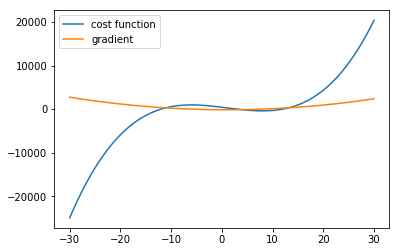

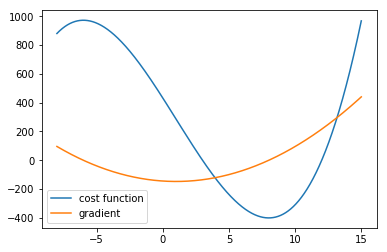

(array([ 8.00000612]), 22)
(array([ 7.99998177]), 27)
(array([ -3.60287971e+19]), 8)


In [2]:
class CubicCostFunction:
    def cost(self, params):
        """
        Implements the curve:
        
        y = x**3 - 3*x**2 - 144*x + 432
        """
        return params**3 - 3*params**2 - 144*params + 432

optimizer = optim.Optimizer(STEP_SIZE, MAX_ITER, TOL, NUMERIC_DIFF_DELTA)
cost = CubicCostFunction()

x_wide = np.arange(-30, 30, 0.01)
x_narrow = np.arange(-8, 15, 0.01)

for x_range in (x_wide, x_narrow):
    # plt.plot(x_range, cost.cost(x_range), x_range, optimizer._gradient(cost, x_range)) - doesn't work
    gradient = np.array([optimizer._gradient(cost, np.array([x])) for x in x_range])
    plt.plot(x_range, cost.cost(x_range), x_range, gradient)
    plt.legend(['cost function', 'gradient'])
    plt.show()
 
# Notice that x is at a local optima where the derivitive == 0

for starting_param in (25, 0, -25):
    print(optimizer.optimize(cost, np.array([starting_param], dtype=np.float64))) 


 ## Experiment 2: Quartic Model

In [0]:
pass


 ## Experiment 3: Gaussian Model

In [0]:
pass


 ## Questions

 1. For experiment 1, what were the solutions for steps 5, 6, and 7? Describe any
 differences that you saw. How do you explain these differences?

 2. For experiment 2, what were the solutions for steps 5, 6, and 7? Describe any
 differences that you saw. Relate your knowledge of global and local optima to this
 discussion. What is the correct solution and why?

 2. For experiment 3, what do you observe when comparing your model with fit parameters
 to your data. If you were to get a new set of independent variables, how could you use
 this model and what information would it give you?
